# Attribute Information:
## Bank client data:
 In the cell below, I am going to study the dataset. The data set contains the following information:
- Age:(numeric)
- Job :type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital :marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education:(categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
## Related with the last contact of the current campaign:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)
## Output variable (The target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Reading the data 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import metrics

In [4]:
from sklearn.metrics import roc_curve, auc

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [6]:
from sklearn.metrics import roc_curve, auc

In [7]:
#df=pd.read_csv('GermanSolarFarm/data/pv_01.csv',delimiter=';')
df=pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv',delimiter=';')

# 1. Data Analysis

## 1.1 Data Exploration 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
print("The number of samples = " , df.shape[0])
print("The number of features =", df.shape[1])

The number of samples =  41188
The number of features = 21


## 1.2 Statistical Summary

In [13]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
#check if there is NULL values
print('Null Values: ', df.isnull().sum())

Null Values:  age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## 1.3 Analysing numerical data 

## Univariate plots

In [15]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## Histogram plot 

To check the distribution of the data, histogram plot is used 


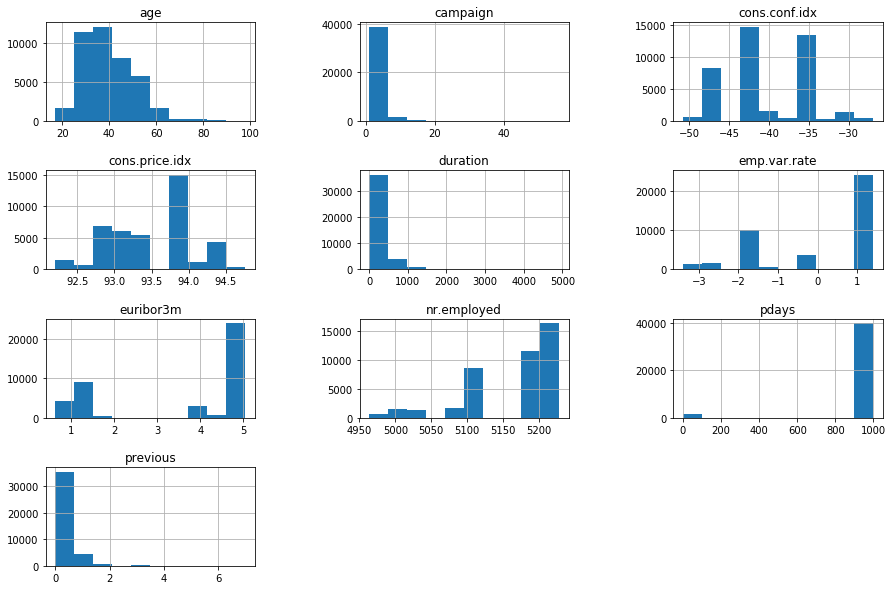

In [16]:
header=df_numerics_only.columns
df_numerics_only.hist(column=header,figsize=(15,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## Box and whisker plots

Box and whisker plots for individual variables give us a much clearer idea of the distribution of input attributes

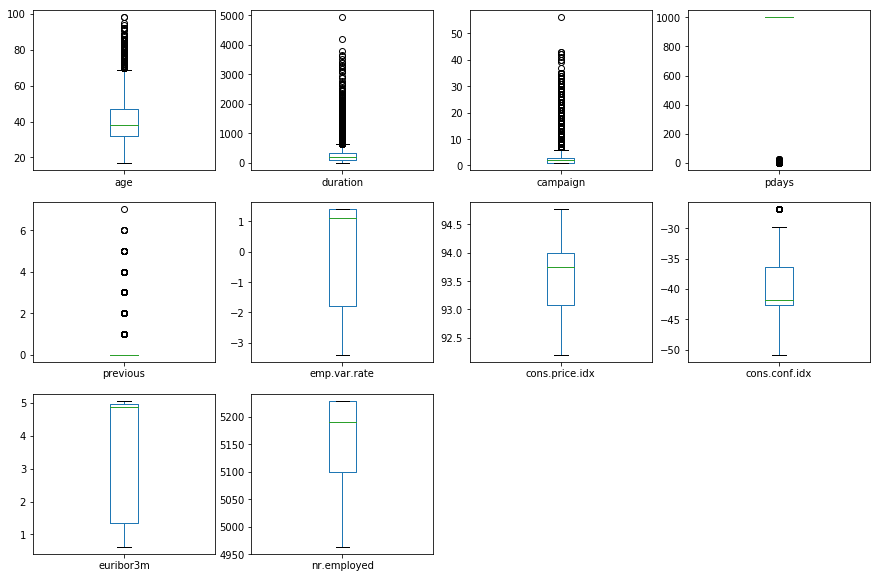

In [17]:
# box and whisker plots
#This gives us a much clearer idea of the distribution of the input attributes:
df_numerics_only.plot(kind='box', subplots=True, layout=(3,4),figsize=(15,10), sharex=False, sharey=False)
plt.show()

## Multivariante Plots

To look at the interactions between the variables,let’s look at scatterplots of all pairs of attributes.
This can be helpful to spot structured relationships between input variables.

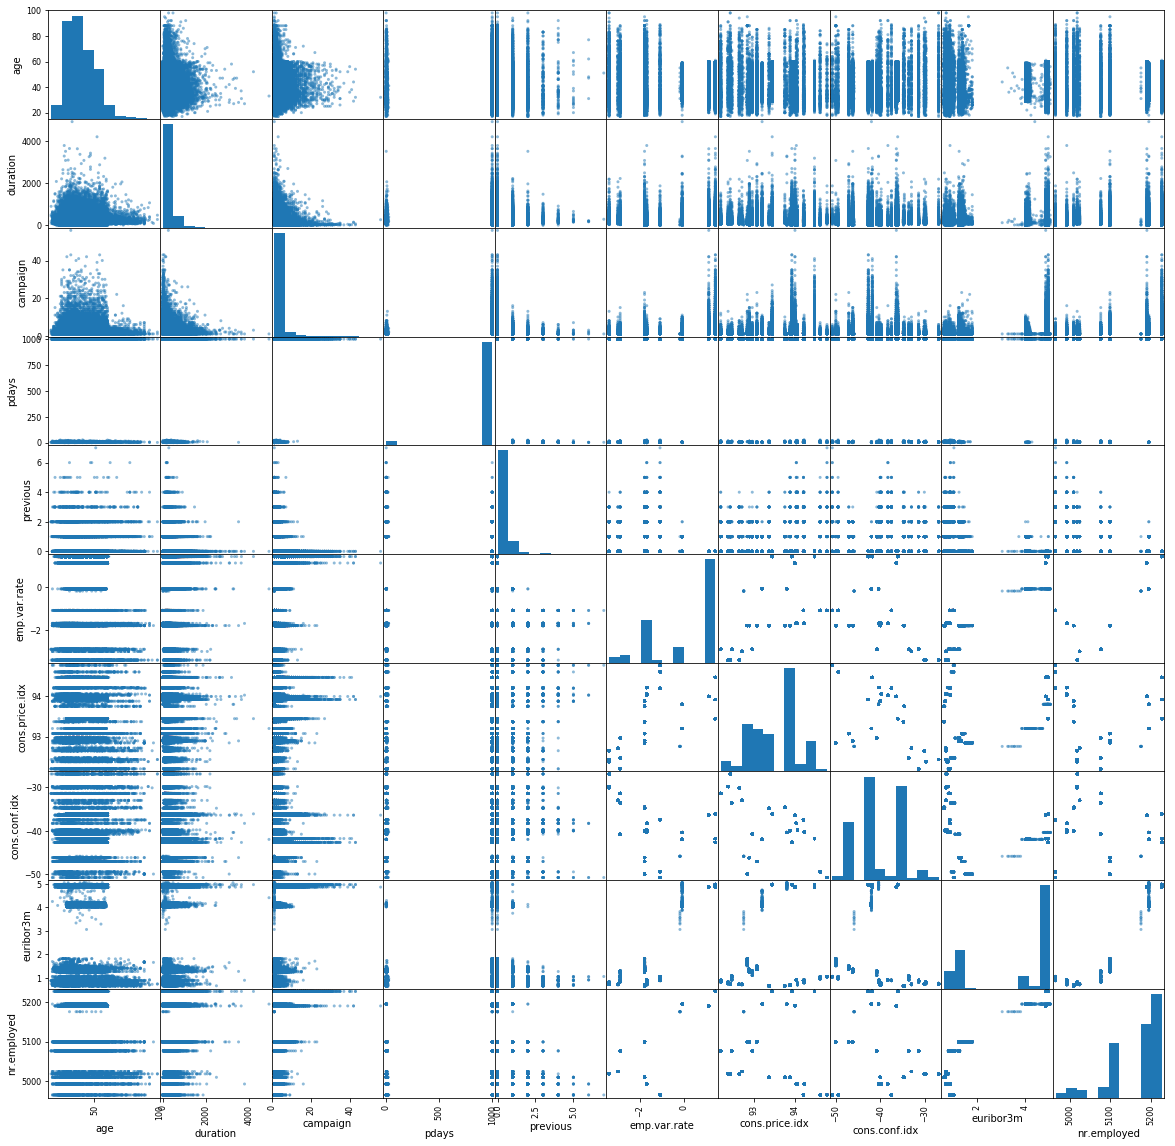

In [18]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_numerics_only,figsize=(20,20))
plt.show()

In [19]:
### from the previous we can see that there is agood relation between age, duration, campaign

### Age variable 

In [20]:
df_numerics_only['age'].head(5)

0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int64

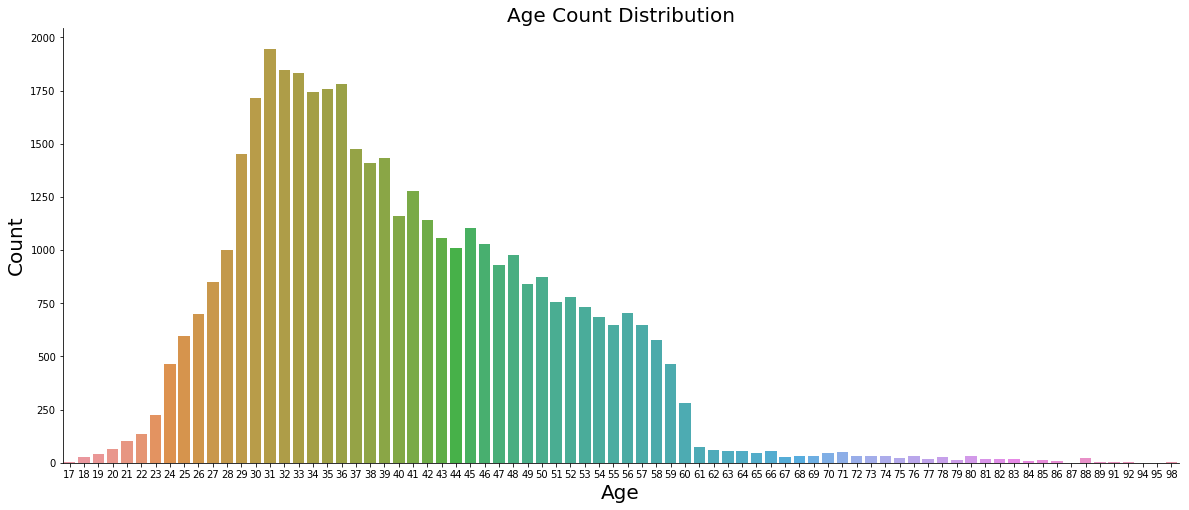

In [21]:
fig, plot = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
plot.set_xlabel('Age', fontsize=20)
plot.set_ylabel('Count', fontsize=20)
plot.set_title('Age Count Distribution', fontsize=20)
sns.despine()

### Duration Variable 

In [22]:
np.arange(0,5000,step=1000)


array([   0, 1000, 2000, 3000, 4000])

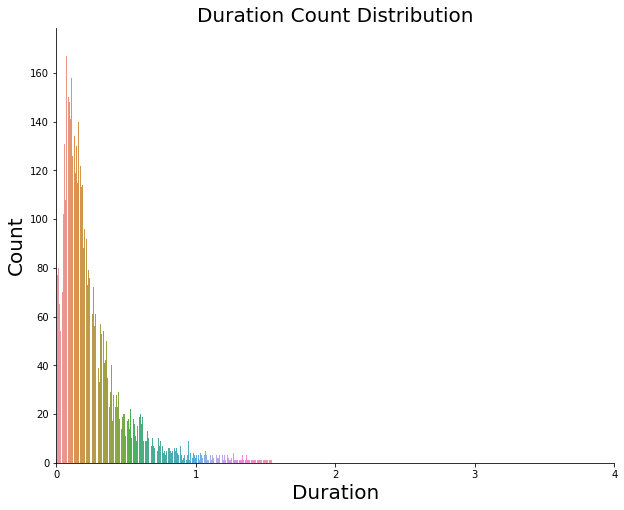

In [23]:
fig, plot = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'duration', data = df)
plot.set_xlabel('Duration', fontsize=20)
plot.set_ylabel('Count', fontsize=20)
plot.set_title('Duration Count Distribution', fontsize=20)
plt.xticks(np.arange(0, 5000, step=1000))
sns.despine()

#### ==================================================================

## 1.4 Analysing Categorical Variables

In [24]:
df_categorical1=df.select_dtypes(exclude=["number"])
df_categorical=df_categorical1.drop(['y'],axis=1)
df_categorical.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [25]:
Cat_Columns=df_categorical.columns

In [26]:
Cat_Columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

c:\users\mahmo\anaconda3\envs\muamar\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


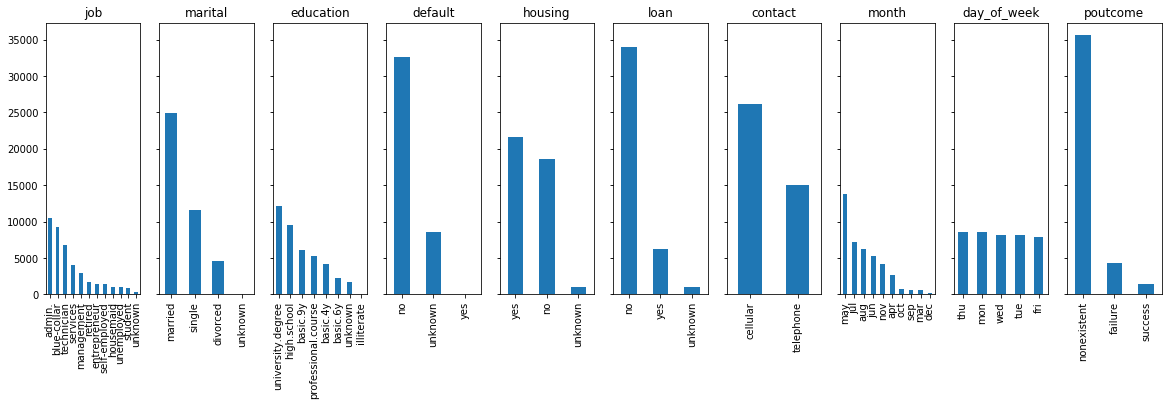

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_features = df_categorical.columns
fig, ax = plt.subplots(1, len(categorical_features),figsize=(20, 5), sharey=True)
for i, categorical_feature in enumerate(df_categorical[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [28]:
df_categorical['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [29]:
df_categorical['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
df_categorical['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

## 1.5 Target variable 

In [31]:
target1=df_categorical1['y']


In [32]:
df_categorical1['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

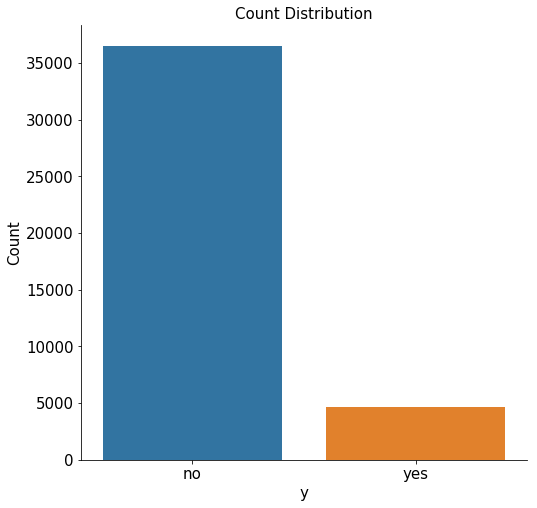

In [33]:
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(target1)
plot.set_xlabel('y', fontsize=15)
plot.set_ylabel('Count', fontsize=15)
plot.set_title('Count Distribution', fontsize=15)
plot.tick_params(labelsize=15)
sns.despine()

In [34]:
## Highly Imbalanced classes

# 2. Data Preprocessing

## 2.1 Preprocessing for numarical variables

### Summarizing (Age ) variable with groups (the frequency table)

we choose quartials to form groups

In [35]:
#Quartiels of Age atribute 
df['age'].quantile([0.25,0.5,0.75,1])

0.25    32.0
0.50    38.0
0.75    47.0
1.00    98.0
Name: age, dtype: float64

In [36]:
bins = df_numerics_only['age'].quantile([0.25,0.5,0.75,1])
#bins = [0, 32, 47,70,98] #"""[0-32] are put as 1,[32-47] are put as 2,[47-70] are put as 3"""#
df_numerics_only['age'] = np.digitize(df['age'], bins)

c:\users\mahmo\anaconda3\envs\muamar\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
df_numerics_only['age'].head()

0    3
1    3
2    1
3    2
4    3
Name: age, dtype: int64

In [38]:
### Summarizing (duration) variable with groups (the frequency table)

In [39]:
#Quartiles of Duration atribute 
df['duration'].quantile([0.25,0.5,0.75,1])

0.25     102.0
0.50     180.0
0.75     319.0
1.00    4918.0
Name: duration, dtype: float64

In [40]:
bins = df_numerics_only['duration'].quantile([0.25,0.5,0.75,1])
#bins = [0, 32, 47,70,98] #"""[0-32] are put as 1,[32-47] are put as 2,[47-70] are put as 3"""#
df_numerics_only['duration'] = np.digitize(df['duration'], bins)

c:\users\mahmo\anaconda3\envs\muamar\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_numerics_only['duration'].head()

0    2
1    1
2    2
3    1
4    2
Name: duration, dtype: int64

## 2.2 Preprocessing for categorical variable

In [42]:
from sklearn import preprocessing

Lable=preprocessing.LabelEncoder()

In [43]:
df_categorical_1=df_categorical.apply(LabelEncoder().fit_transform)

In [44]:
bins = [102,180, 314,644] #"""[0-2] are put as 1,[2-4] are put as 2,[4-6] are put as 3"""#
df_numerics_only['duration'] = np.digitize(df['duration'], bins)

c:\users\mahmo\anaconda3\envs\muamar\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df_categorical_1.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


### Preprocessinc for target 

In [46]:
target= Lable.fit_transform(df['y'])

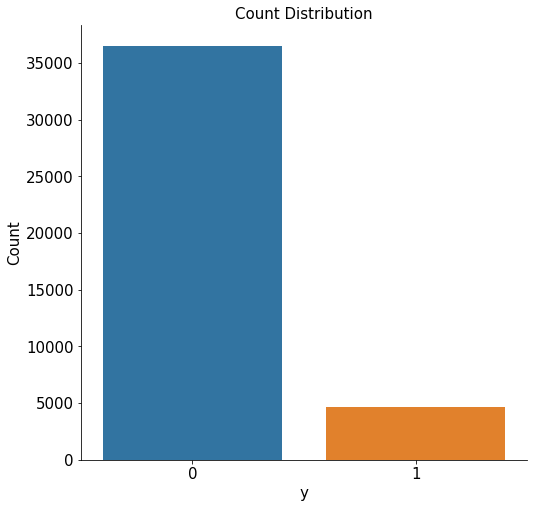

In [47]:
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(target)
plot.set_xlabel('y', fontsize=15)
plot.set_ylabel('Count', fontsize=15)
plot.set_title('Count Distribution', fontsize=15)
plot.tick_params(labelsize=15)
sns.despine()

### Join the datafarmes in X dataframe 

In [48]:
X=pd.concat([df_numerics_only, df_categorical_1], axis = 1)

In [49]:
X=X[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [50]:
X.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,1,7,1,3,0,2,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


### Checking for null data

In [51]:
X.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [52]:
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,1,7,1,3,0,2,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
5,2,7,1,2,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
6,3,0,1,5,0,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
7,2,1,1,7,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
8,0,9,2,5,0,2,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
9,0,7,2,3,0,2,0,1,6,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


To test our algorithem we are going to hold some data that the algorithem will not see and we use this data to check the accuracy for our algorithem 


# 3. Splitting the data into Training and Testing data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, target, test_size = 0.2, random_state = 100)

In [54]:
type(X_test)

pandas.core.frame.DataFrame

## Test Harness
I will use stratified 10-fold cross valedation to estimate module accuracy. This will split the dataset it 10 parts, train on 9 and test on 1 and repeat for all cpmbenatiobns.

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
%matplotlib inline

# 4. Model Selection 


we choose 5 models to run on the data set and we will choose the best one  

In [57]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTreeC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC',GradientBoostingClassifier()))
#models.append(('XGBC',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.908619 (0.002808)
LDA: 0.903611 (0.003729)
KNN: 0.896722 (0.005137)
DTreeC: 0.883884 (0.004847)
NB: 0.840213 (0.005511)
GBC: 0.913384 (0.002964)


## Models Parameters 

In [58]:

models


[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('DTreeC',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, mi

## Models Performance 

AUC is used to test the models performance 

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','y_pred'])

for cls in models:
    model = cls[1].fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    y_pred= model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
       
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'Name':cls[0],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'y_pred':y_pred
                                         }, ignore_index=True)



In [60]:
result_table

,classifiers,fpr,tpr,auc,y_pred,Name
0,tuple,"[0.0, 0.0, 0.0, 0.000136332651670075, 0.000136...","[0.0, 0.0011074197120708748, 0.002214839424141...",0.914892,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LR
1,tuple,"[0.0, 0.0, 0.0, 0.00027266530334015, 0.0002726...","[0.0, 0.0011074197120708748, 0.004429678848283...",0.914944,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LDA
2,tuple,"[0.0, 0.0034083162917518746, 0.012133605998636...","[0.0, 0.058693244739756366, 0.2104097452934662...",0.842724,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",KNN
3,tuple,"[0.0, 0.06584867075664622, 0.06775732788002727...","[0.0, 0.5393133997785161, 0.5459579180509413, ...",0.739365,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",DTreeC
4,tuple,"[0.0, 0.013360599863667348, 0.0137695978186775...","[0.0, 0.2081949058693245, 0.20930232558139536,...",0.813631,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",NB
5,tuple,"[0.0, 0.0, 0.0, 0.000136332651670075, 0.000136...","[0.0, 0.0011074197120708748, 0.014396456256921...",0.940975,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GBC


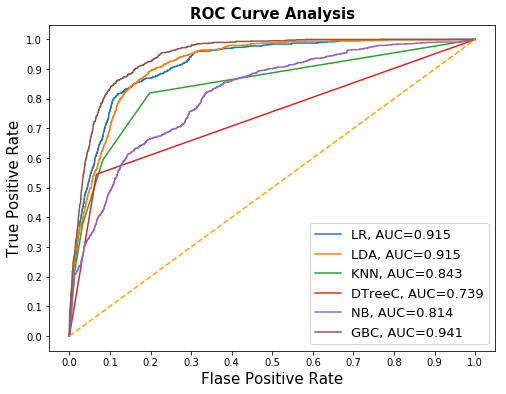

In [61]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table['fpr'].iloc[i], 
             result_table['tpr'].iloc[i], 
              label="{}, AUC={:.3f}".format(result_table['Name'].iloc[i], result_table['auc'].iloc[i]))
             
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [62]:
type(X_test)

pandas.core.frame.DataFrame

In [63]:
type(result_table['y_pred'].iloc[0])

numpy.ndarray

In [64]:
f1_score(y_test,result_table['y_pred'].iloc[0], average='macro')

0.6978836893159144

In [65]:
## Compute F_Measure
from sklearn.metrics import f1_score
for i in result_table.index:
             
    f1_score1=f1_score(y_test,result_table['y_pred'].iloc[i], average='macro')
    print("F1 score for %s is %f" % (result_table['Name'].iloc[i], f1_score1))
    

F1 score for LR is 0.697884
F1 score for LDA is 0.712702
F1 score for KNN is 0.701951
F1 score for DTreeC is 0.729229
F1 score for NB is 0.672721
F1 score for GBC is 0.772029


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)


# 4.The Best Model

## Gredient Boosted Decision trees

#### It is the best 

In [66]:
# model parameters
models[5]

('GBC', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='auto',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False))

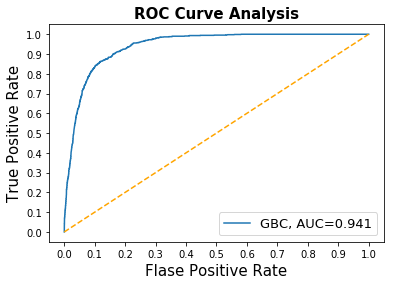

In [67]:
plt.plot(result_table['fpr'].iloc[5], 
             result_table['tpr'].iloc[5], 
              label="{}, AUC={:.3f}".format(result_table['Name'].iloc[5], result_table['auc'].iloc[5]))
             
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


## 4.1 Enhancing the model

In [68]:
# since the model we chose is the best so I am going to enhance the result with parameter tuning 

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [70]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [71]:
gsearch1.score,  gsearch1.best_params_, gsearch1.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=8,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=50,
                                                   min_samples_split=500,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_iter_no_change=None,
    

In [72]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)

print(gbc)
gbc.fit(X_train, y_train)
gbcpred = gbc.predict(X_test)

print(round(accuracy_score(y_test, gbcpred),4)*100)
GBCCV = (cross_val_score(gbc, X_train, y_train, cv=k_fold, n_jobs=4, scoring = 'accuracy').mean())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
91.67999999999999


# 4.2 Result Analysis

## The AUC curve 

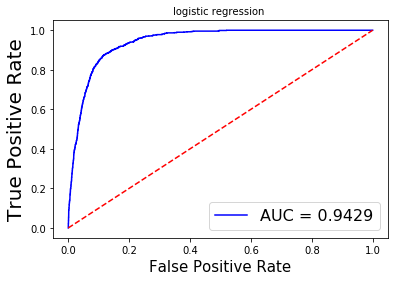

<Figure size 432x288 with 0 Axes>

In [73]:

probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr_gbc, tpr_gbc, thresholdgbc = metrics.roc_curve(y_test, preds)
roc_aucgbc = metrics.auc(fpr_gbc, tpr_gbc)

plt.plot(fpr_gbc, tpr_gbc, 'b', label = 'AUC = %0.4f' % roc_aucgbc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('logistic regression ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

plt.subplots_adjust(wspace=1)

## The Confusion Matrix 

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, gbcpred ))

[[7079  256]
 [ 429  474]]


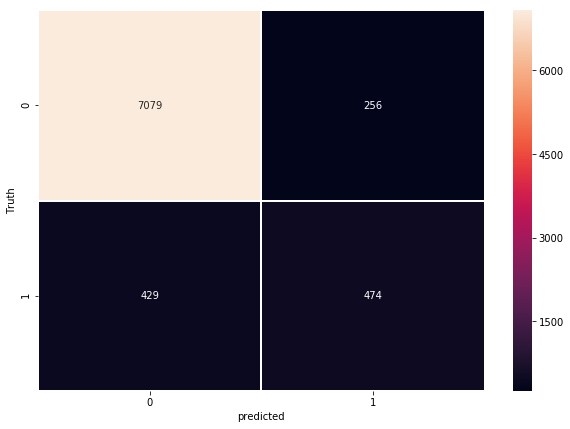

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as  sns

cm = confusion_matrix(y_test, gbcpred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

### Precision 
For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct?
TP / (TP + FP)

In [81]:
Precision=474/(256+474)
print ("Precision=",Precision)

Precision= 0.6493150684931507


### Recall

What proportion of actual positives was identified correctly?
Recall - Sensitivity
TP / (TP + FN) 


Recall
TP / (TP + FN)

In [83]:
Recall=474/(474+429)
print ("Recall=",Recall)

Recall= 0.5249169435215947


## The F1_Score and classification report

In [75]:
print(classification_report(y_test, gbcpred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7335
           1       0.65      0.52      0.58       903

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238

